In [3]:
import pandas as pd 

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

import scikitplot as skplt

In [2]:
# import negative emotion labeled ads
df = pd.read_csv('./data/negative_emotion_dataset.csv').drop(columns= ['Unnamed: 0'])
df

,ad,neg_emo
0,x match your matching gift now will support hu...,1
1,volcán de fuego relief project we are sharing ...,1
2,stand with sharice gtgt republicans to drop a ...,1
3,a dedicated leader with proven experience and ...,1
4,years of obstruction corruption and failed le...,1
...,...,...
23995,oregon the top us producer of christmas trees ...,0
23996,the real winners when we invest in natgas and ...,0
23997,congresswoman mimi walters helped add almost ...,0
23998,trump brags that the economy is booming but s...,0


In [4]:
X_train, X_test,  y_train, y_test = train_test_split(df['ad'], df['neg_emo'], test_size =0.2, random_state=42)

In [5]:
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [6]:
clf =RandomForestClassifier(n_estimators=100)
clf.fit(X_train_tf, y_train)

RandomForestClassifier()

accuracy:   0.861
              precision    recall  f1-score   support

      no-neg       0.85      0.87      0.86      2383
         neg       0.87      0.85      0.86      2417

    accuracy                           0.86      4800
   macro avg       0.86      0.86      0.86      4800
weighted avg       0.86      0.86      0.86      4800

confusion matrix:
[[2070  313]
 [ 354 2063]]



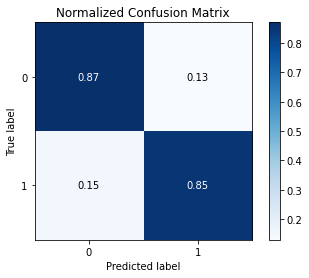

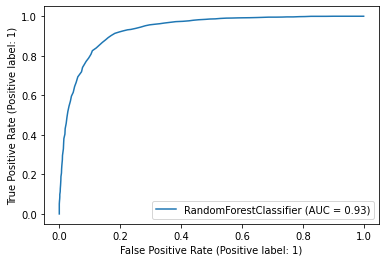

In [12]:
# predict the labels on validation dataset
predictions = clf.predict(X_test_tf)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no-neg', 'neg']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [7]:
df_val = pd.read_csv('./data/sample_negative_emotion.csv')
df_val

,ad,neg_emo
0,See why everyone is celebrating at Hoblit Dodg...,0
1,Help give people without a home a chance to le...,0
2,I am so proud of what this grassroots team has...,0
3,We have until March 31st to raise money for ou...,0
4,Learn how to use the new staffing law to impro...,0
...,...,...
119,Blood donation saves lives!\nThis cannot be sa...,0
120,"Over 10,000 Palestinians have been forced left...",1
121,"Palestine Emergency Appeal: 53 Palestinians, i...",1
122,Let's build Cameroon. Wake up Cameroonians and...,0


accuracy:   0.758
              precision    recall  f1-score   support

  no-neg_emo       0.87      0.74      0.80        82
     neg_emo       0.61      0.79      0.69        42

    accuracy                           0.76       124
   macro avg       0.74      0.76      0.75       124
weighted avg       0.78      0.76      0.76       124

confusion matrix:
[[61 21]
 [ 9 33]]



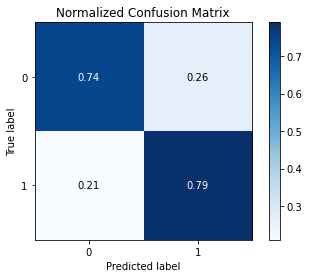

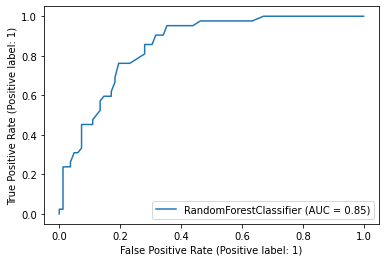

In [14]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['neg_emo']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no-neg_emo', 'neg_emo']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)